# Анализ ДТП в Екатеринбурге

**Содержание**

<a id=0> </a>
[Введение](#1)  
[Предобработка](#2)  
[Внешние условия в момент ДТП](#3)  
[Типология аварий](#4)  
[Районы](#5)  
[Карты](#6)  
[Вывод](#7)

[Дашборд](https://public.tableau.com/app/profile/ekaterina1585/viz/ekb-accidents/Dashboard1?publish=yes)  
[Презентация](https://drive.google.com/file/d/18V1xuetSfPcwX-fzghh-wWGY8mv1X034/view?usp=sharing)

## Введение
<a id=1> </a>

Задача проекта: проанализировать по статистическим данным транспортную безопасность. В качестве района исследования взяли Екатеринбург. Данные о ДТП - из открытого источника - [Сайт](https://dtp-stat.ru/opendata) некоммерческого проекта «Карта ДТП»


**Проект включает**

1. Анализ исторических данных:
- Внешние условия в момент ДТП. Когда происходит больше аварий и почему:
    - Время суток
    - Сезон
    - Срез по годам и месяцам за все время
- Последствия:
    - Категория ДТП
    - Тяжесть ДТП (легкая и тд.)
- Водитель:
    - Пол
    - Стаж вождения
    - В аварии какой степени тяжести попадают водители мужчины и водители женщины?
- Ситуация в городе:
    - В каких районе города происходит больше всего ДТП? Изучить самостоятельно причины.
    - Посмотреть в динамике, в каких районах количество аварий сокращается, а где увеличивается (можно выделить топ-5 районов)
    - В каких районах было больше случаев со смертельным исходом и почему. В каких меньше.
    - В каких районах города участники ДТП чаще получают травмы?

2. Визуализация на карте 
- Визуализировать на карте ДТП в городе с помощью heatmap (за все время):
    - Районы по количеству ДТП
▫️- Визуализировать на карте ДТП района точками за год:
    - Аварии по сезонам
    - Аварии, где водитель мужчина и водитель женщины
    - Аварии по степени тяжести


## Предобработка данных
<a id=2> </a>

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import calendar

import geopandas as gpd
from geopy.geocoders import Nominatim
from shapely.geometry import Polygon

import folium
from folium.plugins import MarkerCluster, HeatMap, HeatMapWithTime
import requests
import json


In [2]:
# сделаем таблицу из файла "плоской"
with open('/Users/09e6y/Desktop/Катькис/geoanalys/sverdlovskaia-oblast.geojson', 'r') as j:
    contents = json.loads(j.read())

df_history = gpd.GeoDataFrame.from_features(contents)
df_history.head()


,geometry,id,tags,light,point,nearby,region,scheme,address,weather,...,datetime,severity,vehicles,dead_count,participants,injured_count,parent_region,road_conditions,participants_count,participant_categories
0,POINT (61.27986 56.41228),2620257,[Дорожно-транспортные происшествия],"В темное время суток, освещение отсутствует","{'lat': 56.412281, 'long': 61.279861}","[Жилые дома индивидуальной застройки, Одиночны...",Каменский,880,"п Ленинский, ул Советская, 10б",[Пасмурно],...,2021-09-26 03:00:00,Легкий,"[{'year': 2013, 'brand': 'ВАЗ', 'color': 'Сини...",0,"[{'role': 'Пешеход', 'gender': 'Женский', 'vio...",1,Свердловская область,"[Сухое, Отсутствие тротуаров (пешеходных дорож...",2,"[Все участники, Пешеходы]"
1,POINT (61.84509 56.35430),2620260,[Дорожно-транспортные происшествия],"В темное время суток, освещение отсутствует","{'lat': 56.354302, 'long': 61.845088}",[],Каменский,010,"Р-354 Екатеринбург - Шадринск - Курган, 101 км",[Ясно],...,2021-09-24 04:35:00,С погибшими,"[{'year': 2019, 'brand': 'ГАЗ', 'color': 'Серы...",2,[],1,Свердловская область,[Сухое],4,[Все участники]
2,POINT (61.60253 56.47734),2645956,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.477342, 'long': 61.60253}",[Нерегулируемый перекрёсток неравнозначных ули...,Каменский,600,"с.Покровское - с.Кисловское - д.Соколова, 1 км",[Ясно],...,2021-11-23 15:40:00,Тяжёлый,"[{'year': 2007, 'brand': 'FORD', 'color': 'Сер...",0,[],2,Свердловская область,[Обработанное противогололедными материалами],2,[Все участники]
3,POINT (61.92576 56.38442),2645970,[Дорожно-транспортные происшествия],"В темное время суток, освещение включено","{'lat': 56.384422, 'long': 61.925758}","[Многоквартирные жилые дома, Остановка обществ...",Каменский,070,"г Каменск-Уральский, ул Суворова, 38",[Пасмурно],...,2021-11-19 17:45:00,Тяжёлый,"[{'year': 2012, 'brand': 'HYUNDAI', 'color': '...",0,[],1,Свердловская область,"[Обработанное противогололедными материалами, ...",3,[Все участники]
4,POINT (61.42954 56.52484),2645973,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 56.524844, 'long': 61.429539}","[Остановка общественного транспорта, Нерегулир...",Каменский,600,"Р-354 Екатеринбург - Шадринск - Курган, 67 км",[Пасмурно],...,2021-11-17 07:45:00,Тяжёлый,"[{'year': 2021, 'brand': 'HYUNDAI', 'color': '...",0,[],3,Свердловская область,[Сухое],3,[Все участники]


### За какое время данные мы имеем?

In [3]:
display(df_history['datetime'].min())
df_history['datetime'].max()


'2015-01-01 03:00:00'

'2022-11-30 22:20:00'

### Добавим колонки, которые понадобятся в дальнейшем анализе

In [4]:
df_history['datetime'] = pd.to_datetime(df_history['datetime']) # преобразуем формат времени

df_history['year'] = df_history['datetime'].dt.year # выделим год в отдельную колонку


In [5]:
df_history['month'] = df_history['datetime'].dt.month
df_history['month'].value_counts()


9     2377
8     2330
7     2281
10    2268
11    2129
6     2060
12    2016
5     1775
1     1689
2     1435
3     1369
4     1352
Name: month, dtype: int64

Необходимо выделить данные, посвященные только Екб и за актуальный период - 2022 год.

In [6]:
# сделаем срез
df = df_history.query('region == "Екатеринбург" and year > 2021').reset_index(drop=True)


In [7]:
# пол виновника
def get_sex(cell):
    try:
        return (cell[0]['participants'][0]['gender'])
    except: return np.nan
df['sex'] = df.vehicles.apply(get_sex)
    

In [8]:
# стаж вождения
def get_stage(cell):
    try:
        return (cell[0]['participants'][0]['years_of_driving_experience'])
    except: return np.nan
df['stage'] = df.vehicles.apply(get_stage)


In [9]:
# характер полученных травм
def get_status(cell):
    try:
        return (cell[0]['participants'][0]['health_status'])
    except: return np.nan
df['health_status'] = df.vehicles.apply(get_status)
df['health_status'].value_counts(normalize = True)

Не пострадал                                                                                                                                        0.690926
Раненый, находящийся (находившийся) на амбулаторном лечении, либо в условиях дневного стационара                                                    0.184310
Раненый, находящийся (находившийся) на стационарном лечении                                                                                         0.058601
Получил телесные повреждения с показанием к лечению в медицинских организациях (кроме разовой медицинской помощи)                                   0.043478
Скончался на месте ДТП до приезда скорой медицинской помощи                                                                                         0.009452
Получил травмы с оказанием разовой медицинской помощи, к категории раненый не относится                                                             0.005671
Скончался в течение 1 суток                               

In [10]:
df['weekday'] = df['datetime'].dt.dayofweek
df['weekday'] = df['weekday'].apply(lambda x:calendar.day_name[x])
df['weekday'].value_counts()


Wednesday    179
Friday       160
Monday       157
Thursday     152
Sunday       147
Tuesday      140
Saturday     123
Name: weekday, dtype: int64

### Пропуски

In [11]:
df.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   geometry                1058 non-null   geometry      
 1   id                      1058 non-null   int64         
 2   tags                    1058 non-null   object        
 3   light                   1058 non-null   object        
 4   point                   1058 non-null   object        
 5   nearby                  1058 non-null   object        
 6   region                  1058 non-null   object        
 7   scheme                  1046 non-null   object        
 8   address                 977 non-null    object        
 9   weather                 1058 non-null   object        
 10  category                1058 non-null   object        
 11  datetime                1058 non-null   datetime64[ns]
 12  severity                1058 non-null   

Пропуски - в адресах, заполним их с помощью geopy по координатам. Для этого нам понадобятся отдельные колонки с широтой и долготой.

In [12]:
df['long'] = df['point'].apply(lambda x: x['long']) # долгота
df['lat'] = df['point'].apply(lambda x: x['lat']) # широта

# как это работает
geolocator = Nominatim(user_agent="my-appln")
location = geolocator.reverse("56.853536, 60.615284")
print(location.address)

df['coordinates'] = df['lat'].astype('str') + ',' + df['long'].astype('str')


36, улица Луначарского, Малевич, Железнодорожный район, Екатеринбург, городской округ Екатеринбург, Свердловская область, Уральский федеральный округ, 620047, Россия


In [13]:
# заполним пропуски в адресах по координатам при помощи geolocator

def fill_address(row):
    if row['address']==None:
          return geolocator.reverse(row['coordinates'])
    return row['address']
df['address'] = df.apply(fill_address, axis=1)


Проверим на дубликаты.

In [14]:
df.duplicated(['id','coordinates']).sum()


0

### Границы районов

Т.к. у нас нет информации о районах, а мы бы хотели отразить их на карте. Достанем информацию о районах из внешних источниках, соберем их в список.
Данные для границ полигонов возьмем из api [open street maps](https://nominatim.openstreetmap.org/ui/search.html).


In [15]:
districts = ['Академический', 'Верх-Исетский', 'Железнодорожный', 'Кировский', 'Ленинский', 'Октябрьский', 'Орджоникидзевский', 'Чкаловский']

In [16]:
lst_d = []
lst_poly = []
# в цикле обратимся к api `open street maps` для каждого района
for d in districts:
    dis = json.loads(requests.get(f"http://nominatim.openstreetmap.org/search?q={d} район Екатеринбург&polygon_geojson=1&format=json").text)[0]
    lst_sets = []
    for elem in dis['geojson']['coordinates'][0]:
        lst_sets.append(tuple(elem))
    lst_d.append(d)
    lst_poly.append(Polygon(lst_sets))

In [17]:
df_polygons = pd.DataFrame()
df_polygons['district'] = lst_d
df_polygons['geometry'] = lst_poly


<a id=00> </a> 
&#8595;

In [18]:
ekb_map = folium.Map(location=[56.8519, 60.6122], zoom_start = 10)
for _, d in df_polygons.iterrows():
    sim_geo = gpd.GeoSeries(d['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    
    folium.Popup(d['district']).add_to(geo_j)
    geo_j.add_to(ekb_map)
ekb_map


Мы добавили недостающие адреса и нарисовали карту районов. Можно перейти к исследованию данных.

# Исследовательский анализ

Как много ДТП произошло в Екатеринбурге с 2021 года? 

In [19]:
print('Общее число происшествий в 2021-2022 годах: {}'.format(df.shape[0]))

Общее число происшествий в 2021-2022 годах: 1058


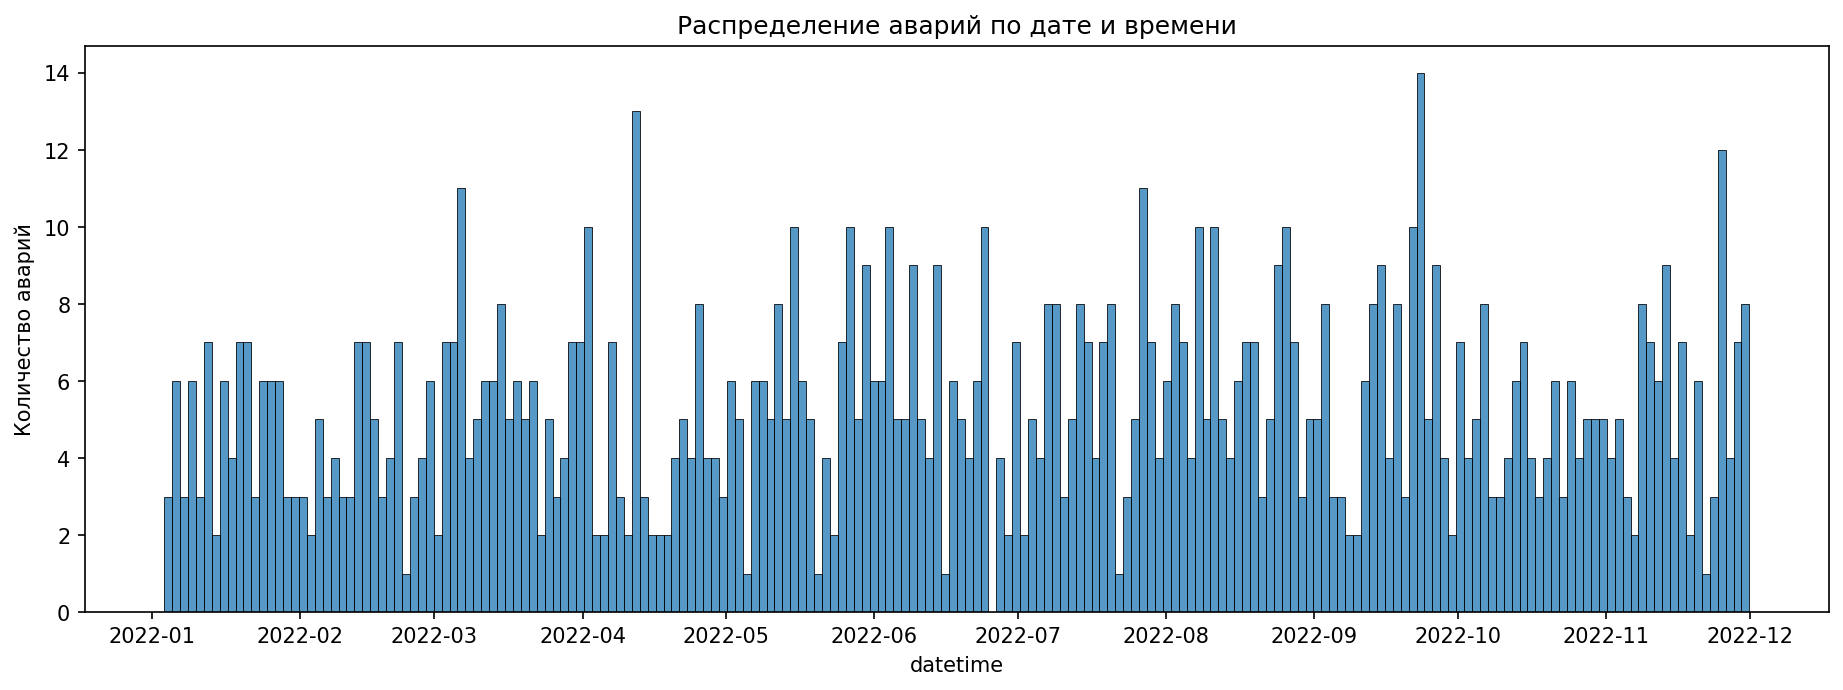

In [20]:
# построим гистограмму распределения событий по дням
fig, ax=plt.subplots(figsize=(15, 5), dpi=150)
ax=sns.histplot(data=df, x='datetime', bins=200)
plt.title('Распределение аварий по дате и времени')
plt.ylabel('Количество аварий');

Трудно привязать пики к каким-то конкретным сезонным данным (как бы ни хотелось), у нас слишком мало данных, и 14 аварий - может быть и пиковое значение, но это всего 14 на 1,4 миллиона жителей, то есть 1 на 100 000.

### Срез по годам за все время

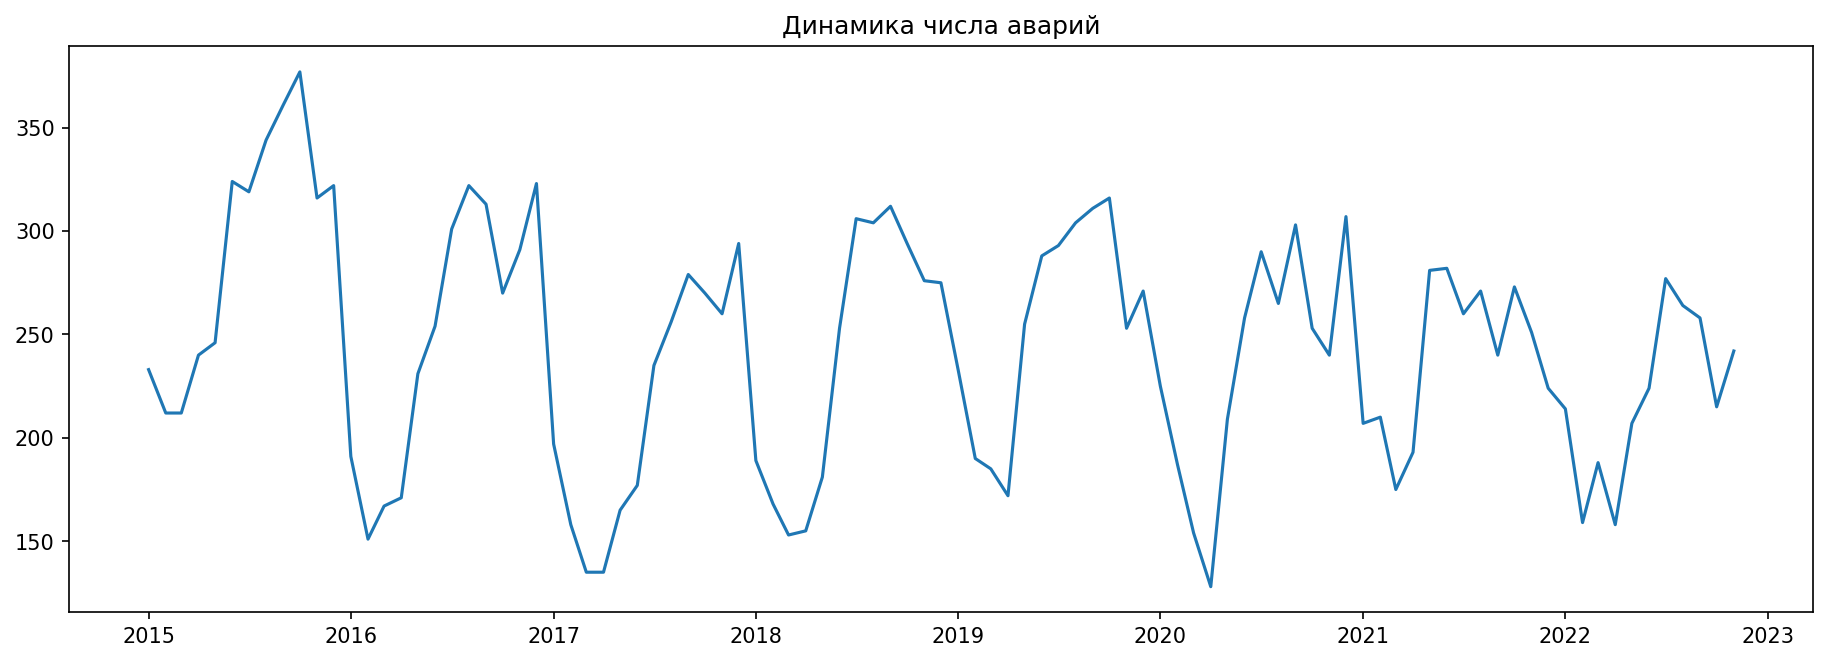

In [21]:
df_history['month'] = df_history['datetime'].astype('datetime64[M]')
month_pivot = df_history.pivot_table(index = 'month', values = 'id', aggfunc='count').reset_index()

fig, ax=plt.subplots(figsize=(15, 5), dpi=150)
ax = sns.lineplot(data = month_pivot, x = 'month', y='id')
plt.title('Динамика числа аварий')
plt.xlabel('')
plt.ylabel('')
plt.savefig('Динамика.png');
df_history['month'] = df_history['datetime'].dt.month


Очень живописный провал в каждом начале года, и особенно - в 2020. В целом кажется что аварий становится меньше.

[Содержание](#0)

## Внешние условия в момент ДТП
<a id=3> </a>

### Распределение по месяцам

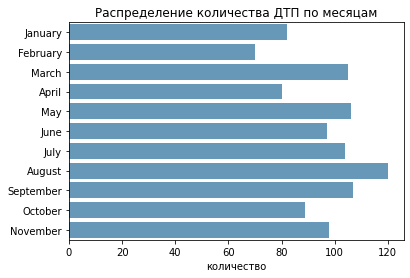

In [22]:
accidents_month = (
    df.groupby(df['month'])
               .agg(ac_count=('id', 'count'))
)
accidents_month.index=[calendar.month_name[x] for x in range(1,12)]

accidents_month.reset_index(inplace=True)
accidents_month.columns=['month', 'ac_count']
sns.barplot(data=accidents_month, y = 'month', x='ac_count', color='#5a9bc5')
plt.title('Распределение количества ДТП по месяцам')
plt.ylabel('')
plt.xlabel('количество');

In [23]:
accidents_month 

,month,ac_count
0,January,82
1,February,70
2,March,105
3,April,80
4,May,106
5,June,97
6,July,104
7,August,120
8,September,107
9,October,89


Видим постепенный рост числа аварий с марта, пик - в августе и спад - начиная с октября, но в среднем количество аварий стабильно между 70 и 100 в месяц. Можем продемонстрировать распределение на боксплоте.

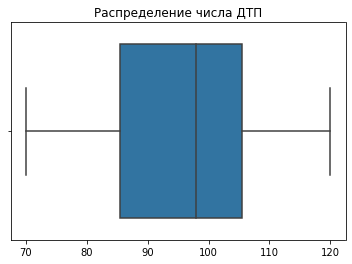

In [24]:
sns.boxplot(x = accidents_month.ac_count)
plt.title('Распределение числа ДТП')
plt.xlabel('');


Посмотрим на исторические данные.

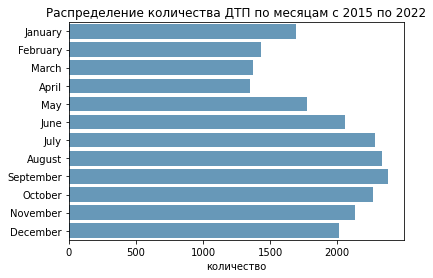

In [25]:
accidents_month = (
               df_history
               .groupby(df_history['month'])
               .agg(ac_count=('id', 'count'))
)
accidents_month.index=[calendar.month_name[x] for x in range(1,13)]

accidents_month.reset_index(inplace=True)
accidents_month.columns=['month', 'ac_count']
sns.barplot(data=accidents_month, y = 'month', x='ac_count', color='#5a9bc5')
plt.title('Распределение количества ДТП по месяцам c 2015 по 2022')
plt.ylabel('')
plt.xlabel('количество');


Если взять все время, увидим значительный спад с февраля по апрель.

### Распределение по дням недели

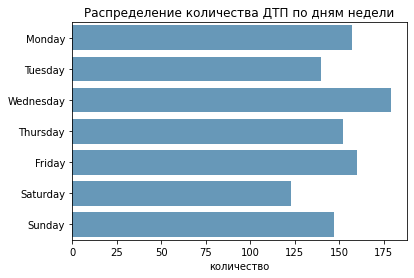

In [26]:
accidents_days = (
    df.groupby(df['datetime']
               .dt.dayofweek)
               .agg(ac_count=('id', 'count'))
)
accidents_days.index=[calendar.day_name[x] for x in range(0,7)]

accidents_days.reset_index(inplace=True)
accidents_days.columns=['day', 'ac_count']
sns.barplot(data=accidents_days, y = 'day', x='ac_count', color='#5a9bc5')
plt.title('Распределение количества ДТП по дням недели')
plt.ylabel('')
plt.xlabel('количество');


Почему-то больше всего аварий по средам, а меньше всего - по субботам. 

### Время суток

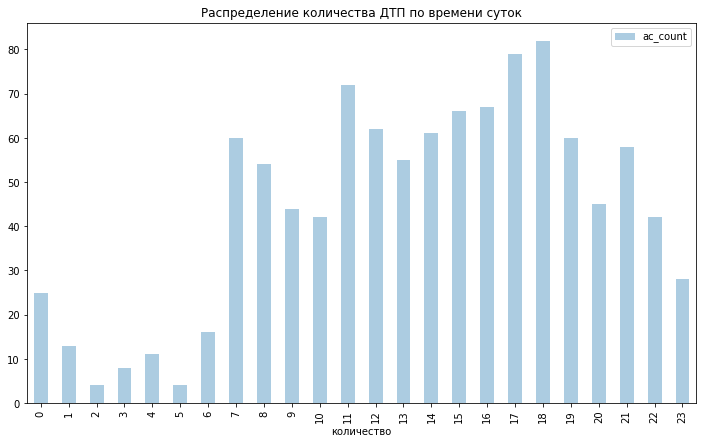

In [27]:
accidents_hour = (
    df.groupby(df['datetime']
               .dt.hour)
               .agg(ac_count=('id', 'count'))
)

accidents_hour.plot(kind='bar',figsize=(12,7), color='#5a9bc5', alpha=0.5)

plt.title('Распределение количества ДТП по времени суток')
plt.ylabel('')
plt.xlabel('количество');

Пиковое время: 7:00, 11:00 и вечерний час-пик с 17:00 до 19:00, ночью - затишье.

Посмотрим, как зависит тяжесть аварий от вермени.

In [28]:
accidents_hour_day = (
                    df.groupby([(df['datetime']
                    .dt.hour), 'weekday'])
                    .agg({'id':'count'})
                    .reset_index()
) 


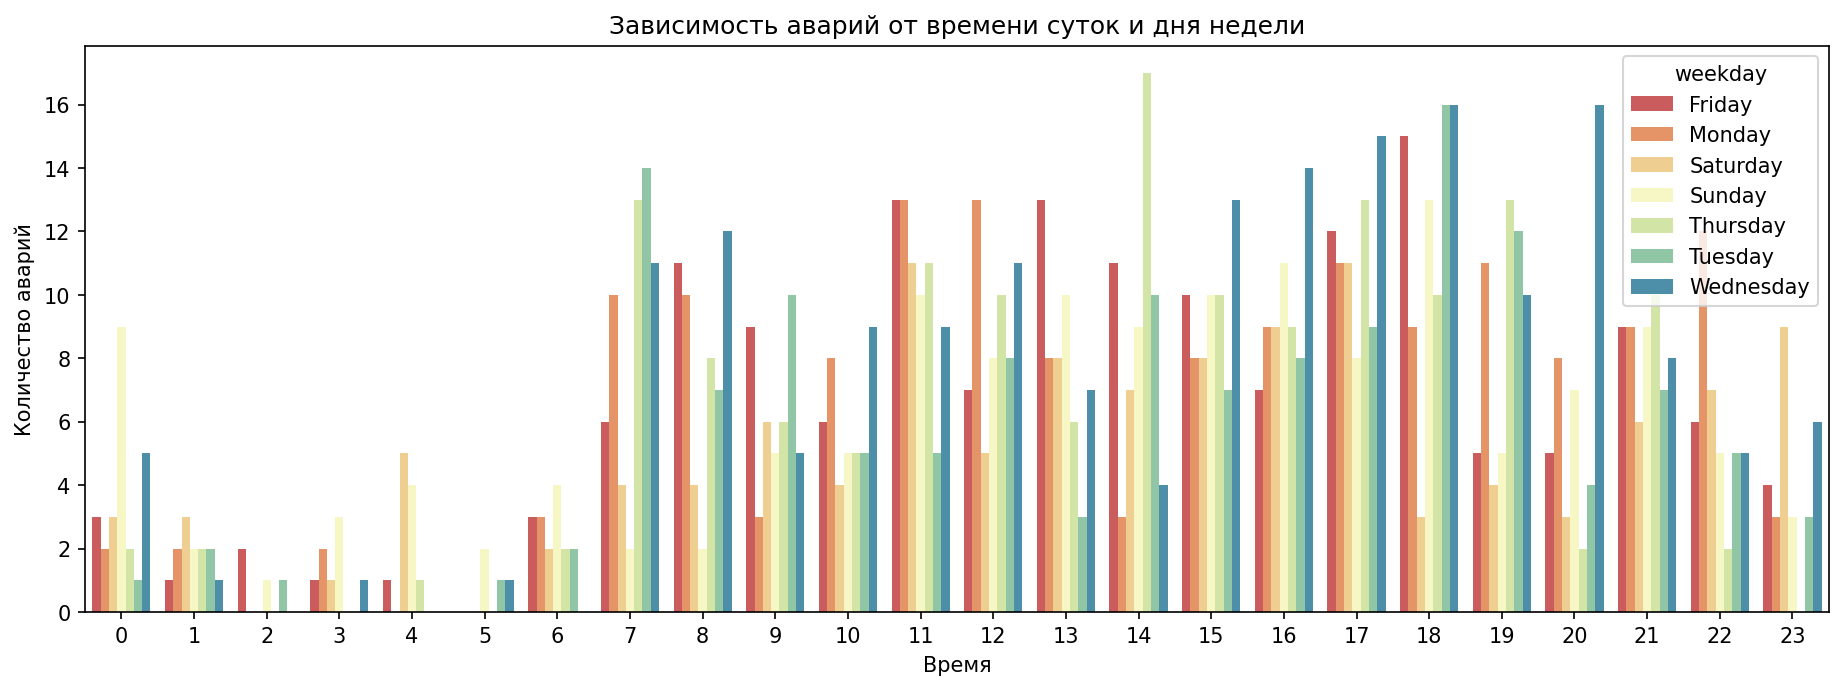

In [29]:
fig, ax=plt.subplots(figsize=(15, 5), dpi=150)
ax=sns.barplot(
    data = accidents_hour_day,
    y = 'id',
    x='datetime',
    hue='weekday',
    palette='Spectral'
)
plt.title('Зависимость аварий от времени суток и дня недели')
plt.ylabel('Количество аварий')
plt.xlabel('Время');


Ночью в входные дни чуть больше вероятность аварий, чем ночью в будни.


### Сезон

В какое время года больше всего аварий? 

In [30]:
def season(row):
    month = row['month']
    if 1 <= month <= 2 or month == 12:
        return 'winter'
    elif 3 <= month <= 5:
        return 'spring'
    elif 6 <= month <= 8:
        return 'summer'
    return 'autumn'
df['season'] = df.apply(season, axis = 1)
df['season'].value_counts()


summer    321
autumn    294
spring    291
winter    152
Name: season, dtype: int64

In [31]:
season_chart = (
    df.groupby('season')
    .agg({'id' : 'count'})
)
season_chart


,id
season,
autumn,294
spring,291
summer,321
winter,152


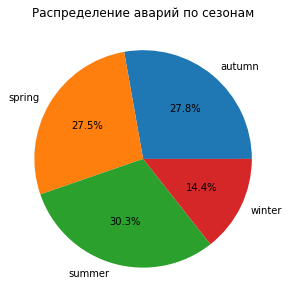

In [32]:
season_chart.plot(kind='pie', y = 'id', figsize=(5,5), autopct='%1.1f%%', legend = False)
plt.ylabel('')
plt.title('Распределение аварий по сезонам')
plt.savefig('сезоны_1.png', dpi=90, bbox_inches='tight');


Число аварий зимой чуть меньше, чем в остальное время года. С одной стороны, у нас не полные данные за декабрь, потому что в предновогодних пробках наверняка происходит много аварий, а с другой - в Екатеринбурге есть автомобильная чезонномть - часть людей ставит на автомобиль в гараж на зиму и пользуется общественным транспортом. Но чтобы проверить нашу теорию, посмотрим на данные за все время.

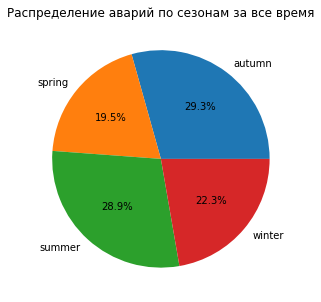

In [33]:
df_history['season'] = df_history.apply(season, axis = 1)

season_chart = (
    df_history.groupby('season')
    .agg({'id' : 'count'})
)
season_chart.plot(kind='pie', y = 'id', figsize=(5,5), autopct='%1.1f%%', legend = False)
plt.ylabel('')
plt.title('Распределение аварий по сезонам за все время')
plt.savefig('сезоны_2.png', dpi=90, bbox_inches='tight');


На осень и зиму приходится около 42% аварий.

[Содержание](#0)

## Типология аварий
<a id=4> </a>


Какие разновидности ДТП в наших данных и какие более распространены.

### ДТП по тяжести

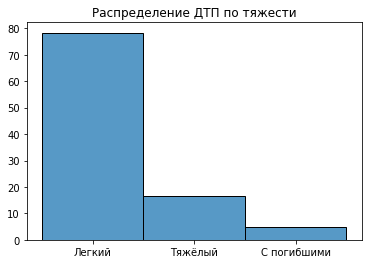

In [34]:
sns.histplot(df['severity'], stat="percent")
plt.title('Распределение ДТП по тяжести')
plt.xlabel('')
plt.ylabel('');


Почти 80% ДТП в Екатеринбургне - легкие и менее 10% - с погибшими.


### Типы ДТП 

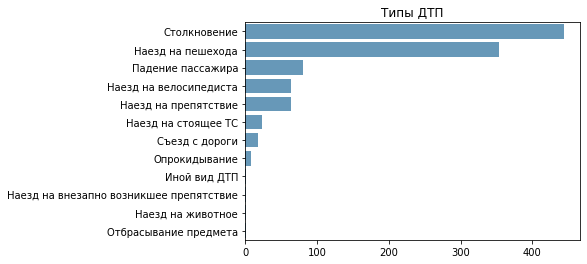

In [35]:
df_cat = df.groupby('category', as_index=False).agg({'id' : 'count'}).sort_values(by ='id',ascending=False)
sns.barplot(data = df_cat, x='id', y='category', color='#5a9bc5')
plt.xlabel('')
plt.ylabel('')
plt.title('Типы ДТП');


### Количество вовлеченных автомобилей

In [36]:
df.participants_count.value_counts()


2     678
3     229
4      76
1      33
5      28
6       7
8       3
7       3
11      1
Name: participants_count, dtype: int64

Инетесно, что столкновение сразу 4 автомобилей более вероятно, чем аварий с участием 1. И есть инцидент, когда столкнулось сразу 11. Рассмотрим этот случай поближе.

In [37]:
df.query('participants_count == 8')['address']

111                 г Екатеринбург, ул Крауля, 8
771             г Екатеринбург, ул Щербакова, 12
1013    г Екатеринбург, ул Академика Бардина, 17
Name: address, dtype: object

Можем найти в [новостях](https://www.e1.ru/text/incidents/2022/03/21/70522964/) информацию о данном ДТП. 
Вкратце, столкнулись водитель автобуса протаранил троллейбус из-за сколькзой дороги. 


Оказывается, мы неправильно читали данные, и количество участников - это количесвтво участников-людей, а не участников-автомобилей.

### Распределение участников по полу

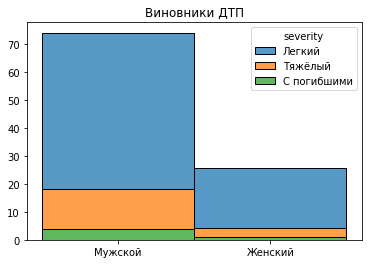

In [38]:
sns.histplot(data = df, x = 'sex', hue = 'severity', stat="percent", multiple="stack" )
plt.title('Виновники ДТП')
plt.xlabel('')
plt.ylabel('');


Согласно данным, женщины являются виновницами примерно 20% аварий. Распределение по тяжести - примерно проорционально. Тут наверное было бы правильно сравнить с общим количеством водителей и распределением в нем мужчин и женщин. [Вот](https://арена-ра.рф/sovety/statistika-avarij-zhenshchin-i-muzhchin.html) примерная информация, которую мне удалось найти на этот счет.

### Стаж вождения

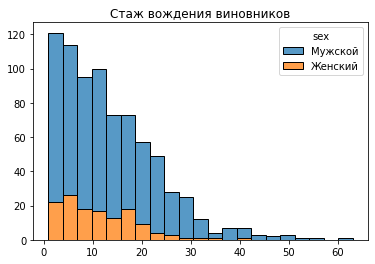

In [39]:
sns.histplot(data = df, x = 'stage', hue='sex', multiple="stack" )
plt.title('Стаж вождения виновников')
plt.xlabel('')
plt.ylabel('');


Интересно, что у женщин аварии не так сильно коррелируют со стажем вождения как у мужчин. А еще женщин со стажем вождения больше 30 лет в Екб почти нет.

[Содержание](#0)

## Распространение по районам города
<a id=5> </a>


В каких районах произошли наши аварии?

In [40]:
# создаем списки районов и полигонов, извлекая координаты из колонки `geometry`
list_districts = []
list_points = []
list_polygons = []
list_id = []
for i in range(len(df_polygons)):
    for j in range(len(df_history)):
        if df_polygons['geometry'][i].contains(df_history['geometry'][j]):
            list_districts.append(df_polygons['district'][i]) 
            list_points.append(df_history['geometry'][j])
            list_polygons.append(df_polygons['geometry'][i])
            list_id.append(df_history['id'][j])
            

In [41]:
# Создаем таблицу с точками и районами
district_points = pd.DataFrame()
district_points['district'] = list_districts
district_points['geometry_points'] = list_points
district_points['geometry_polygons'] = list_polygons
district_points['id'] = list_id
district_points.head()


,district,geometry_points,geometry_polygons,id
0,Академический,POINT (60.51411 56.80216),"POLYGON ((60.3838205 56.8001734, 60.3840566 56...",1784084
1,Академический,POINT (60.471776 56.788869),"POLYGON ((60.3838205 56.8001734, 60.3840566 56...",2605487
2,Академический,POINT (60.506312 56.794339),"POLYGON ((60.3838205 56.8001734, 60.3840566 56...",2646031
3,Академический,POINT (60.494821 56.80512),"POLYGON ((60.3838205 56.8001734, 60.3840566 56...",2646114
4,Академический,POINT (60.444546 56.802999),"POLYGON ((60.3838205 56.8001734, 60.3840566 56...",2646161


Теперь добавим район по `id` в нашу таблицу.


In [42]:
df = df.merge(district_points[['id', 'district']], on='id')
df_history = df_history.merge(district_points[['id', 'district']], on='id')

display(df.shape)
display(df_history.shape)
df['district']


(1058, 32)

(7745, 25)

0               Ленинский
1               Ленинский
2         Железнодорожный
3       Орджоникидзевский
4               Ленинский
              ...        
1053            Ленинский
1054        Верх-Исетский
1055            Ленинский
1056    Орджоникидзевский
1057      Железнодорожный
Name: district, Length: 1058, dtype: object

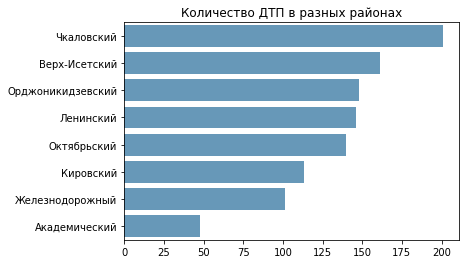

In [43]:
districts_df = (
    df.groupby('district',
               as_index=False)
               .agg({'id' : 'count'})
               .sort_values(by ='id', ascending=False)
)
sns.barplot(data = districts_df, y='district', x='id', color='#5a9bc5')
plt.title('Количество ДТП в разных районах')
plt.xlabel('')
plt.ylabel('');

Если посмотреть на [карту](#00), увидим что Академический - просто самый маленький по площади, а Чкаловский - самый большой.

Посмотрим так же, где более распространены ДТП со смертельным исходом.

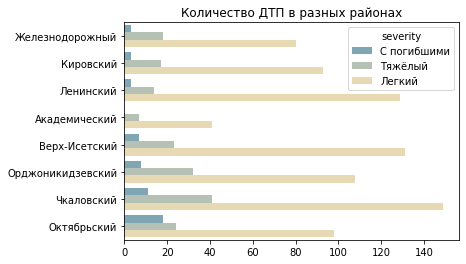

In [44]:
districts_df = (
    df.groupby(['district', 'severity'],
               as_index=False)
               .agg({'id' : 'count'})
               .sort_values(by =['id', 'district'])
)

sns.barplot(data = districts_df, y='district', x='id', hue='severity', palette="blend:#7AB,#EDA")
plt.title('Количество ДТП в разных районах')
plt.xlabel('')
plt.ylabel('');

В Академическом ДТП со смертельным исходом почти нет, потому что это маленький спальный район. А в Октябрьском их доля больше всего - не удиительно, это во-первых, большой по площади район, а во сторых, в нем расположена дорога в Аэропорт и еще несколько автострад с высоким скоростным режимом.

### Динамика аварий по районам

In [45]:
district_pivot = (
    df_history.pivot_table(
        index = ['year', 'district'],
        values = 'id',
        aggfunc='count')
        .reset_index()
)
district_pivot

,year,district,id
0,2015,Академический,26
1,2015,Верх-Исетский,175
2,2015,Железнодорожный,88
3,2015,Кировский,100
4,2015,Ленинский,118
...,...,...,...
59,2022,Кировский,113
60,2022,Ленинский,146
61,2022,Октябрьский,140
62,2022,Орджоникидзевский,148


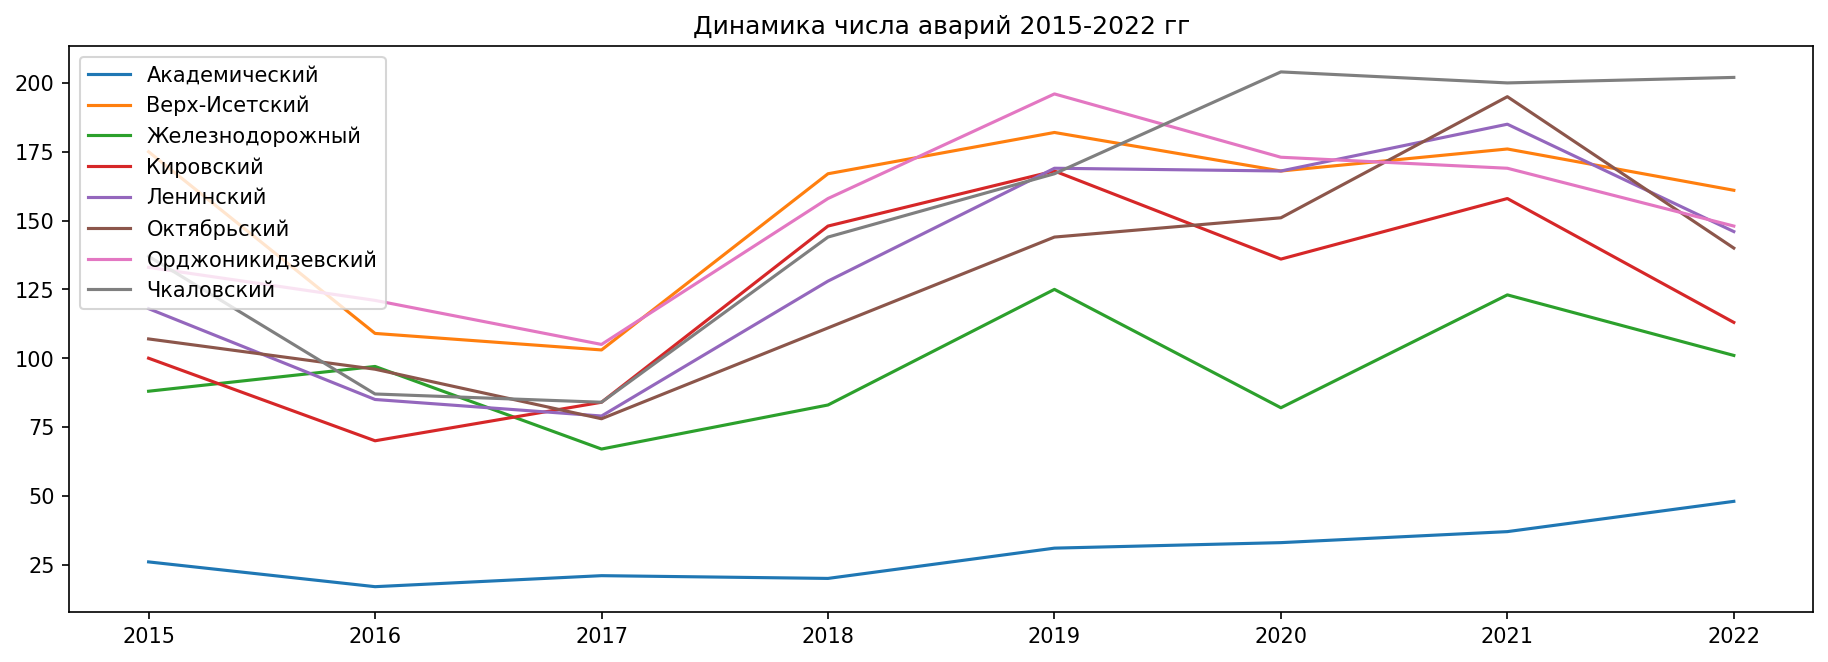

In [46]:
fig, ax=plt.subplots(figsize=(15, 5), dpi=150)
ax = sns.lineplot(
    data = district_pivot,
    x = 'year',
    y='id',
    hue='district')
plt.title('Динамика числа аварий 2015-2022 гг')
plt.xlabel('')
plt.ylabel('')
plt.legend(loc = 'upper left');

Видим, что динамика по районам похожая: с 2016 по 2017 годах везде было снижение, а с 17 года пошел рост ДТП, c 2021 года у всех кроме Чкаловского района спад, но в то же время и Академический начал расти.

### Динамика аварий по тяжести

Посмотрим на динамику смертельных исходов.

In [47]:
# добавим статистику о тяжести ДТП
district_pivot = (
    df_history.pivot_table(
        index = ['year', 'district', 'severity'],
        values = 'id',
        aggfunc='count')
        .reset_index()
)

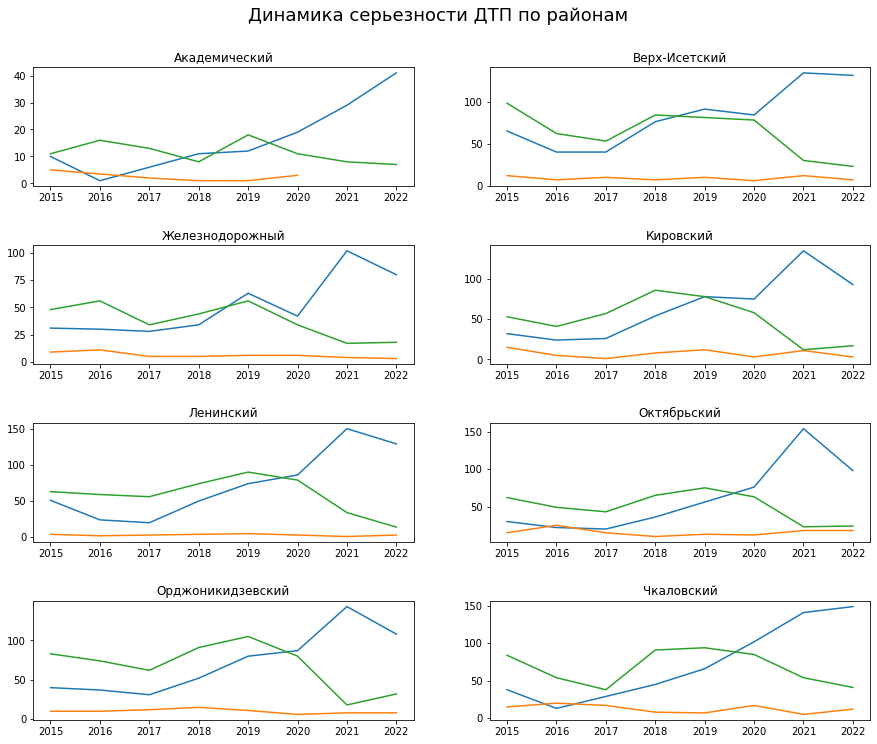

In [48]:
# построим графики отдельно для каждого района за все время 
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Динамика серьезности ДТП по районам", fontsize=18, y=0.95)
ncols = 2
nrows = len(districts) // ncols + (len(districts) % ncols > 0)

for n, district in enumerate(districts):
    # add a new subplot iteratively using nrows and cols
    ax = plt.subplot(nrows, ncols, n + 1)

    # filter df and plot ticker on the new subplot axis
    ax = sns.lineplot(
    data = district_pivot[district_pivot["district"] == district],
    x = 'year',
    y='id',
    hue='severity')
    # chart formatting
    ax.set_title(district)
    ax.get_legend().remove()
    ax.set_xlabel("")
    ax.set_ylabel("")
plt.savefig('динамика_тяжесть.png', dpi=90, bbox_inches='tight');

1. В Академическом с 2020 не было ДТП со смертельным исходом.
2. Во всех районах количество тяжёлых ДТП снижается, а легких - растет, но в 2022 году снижалось количество всех видов ДТП почти во всех районах. Но у нас нет статистики за последний месяц, поэтому данные могут быть не точными. Лучше подождать окончания исследуемого периода, прежде чем делать выводы.


### Характер полученных травм

In [49]:
df['health_status'].value_counts(normalize=True)

Не пострадал                                                                                                                                        0.690926
Раненый, находящийся (находившийся) на амбулаторном лечении, либо в условиях дневного стационара                                                    0.184310
Раненый, находящийся (находившийся) на стационарном лечении                                                                                         0.058601
Получил телесные повреждения с показанием к лечению в медицинских организациях (кроме разовой медицинской помощи)                                   0.043478
Скончался на месте ДТП до приезда скорой медицинской помощи                                                                                         0.009452
Получил травмы с оказанием разовой медицинской помощи, к категории раненый не относится                                                             0.005671
Скончался в течение 1 суток                               

In [50]:
trauma = df['health_status'].value_counts(normalize=True).to_frame()
trauma.health_status = round(trauma.health_status*100, 2)


In [51]:
trauma

,health_status
Не пострадал,69.09
"Раненый, находящийся (находившийся) на амбулаторном лечении, либо в условиях дневного стационара",18.43
"Раненый, находящийся (находившийся) на стационарном лечении",5.86
Получил телесные повреждения с показанием к лечению в медицинских организациях (кроме разовой медицинской помощи),4.35
Скончался на месте ДТП до приезда скорой медицинской помощи,0.95
"Получил травмы с оказанием разовой медицинской помощи, к категории раненый не относится",0.57
Скончался в течение 1 суток,0.28
Скончался при транспортировке,0.19
"Получил телесные повреждения с показанием к лечению в медицинских организациях, фактически лечение не проходил, к категории раненый не относится",0.09
"Скончался на месте ДТП по прибытию скорой медицинской помощи, но до транспортировки в мед. организацию",0.09


70% участвовавших в ДТП не пострадали. Посмотрим, как оставшиеся распределены по районам города.

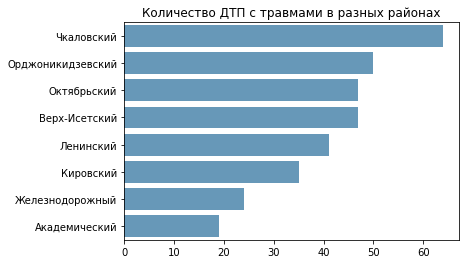

In [52]:
trauma = (
    df.query('health_status != "Не пострадал"')
    .groupby('district',
            as_index=False)
            .agg({'id' : 'count'})
            .sort_values(by =['id', 'district'], ascending=False)
)

sns.barplot(data = trauma, y='district', x='id', color='#5a9bc5')
plt.title('Количество ДТП с травмами в разных районах')
plt.xlabel('')
plt.ylabel('')
plt.savefig('травмы.png', dpi=90, bbox_inches='tight');

Меньше всего травм - в Академическом, и больше всего - в Чкаловском.

Посмотрим как наша статистика выглядит на карте.

[Содержание](#0)

## ДТП на карте
<a id=6> </a>

### Тяжёлые ДТП и ДТП со смертельным исходом.

In [53]:
incidents_accident = folium.map.FeatureGroup()
latitudes = list(df.lat)
longitudes = list(df.long)
labels = list(df.severity)
for lat, lng, label in zip(latitudes, longitudes, labels):
    if label == 'С погибшими':
        folium.features.CircleMarker(
        location = [lat, lng],
        radius=3,
        popup = label,
        color='darkred',
        fill=True,
        fill_opacity=0.6
        ).add_to(ekb_map)
    elif label =='Тяжёлый':
        folium.features.CircleMarker(
        location = [lat, lng],
        radius=3,
        popup = label,
        color='blue',
        fill=True,
        fill_opacity=0.6).add_to(ekb_map)
        
ekb_map.add_child(incidents_accident)
ekb_map


### Тепловая карта

Можно посмотреть на тепловой карте, в какие часы в городе происходит больше аварий.

In [54]:
ekb_map = folium.Map(location=[56.8519, 60.6122], zoom_start = 10)

# создадим вложенный список с часами и координатами
hour_list = [[] for _ in range(24)]
for lat,log,hour in zip(df.lat,df.long,df.datetime.dt.hour):
    hour_list[hour].append([lat,log]) 

# индекс-бар
index = [str(i)+' Hours' for i in range(24)]

# добавим на карту
HeatMapWithTime(hour_list, index).add_to(ekb_map)
# добавим границы районов
for _, d in df_polygons.iterrows():
    sim_geo = gpd.GeoSeries(d['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    
    folium.Popup(d['district']).add_to(geo_j)
    geo_j.add_to(ekb_map)
ekb_map


Нарисуем так же тепловую карту, на которой будут видны опасные районы (места, где сконцентрированы дтп).

In [55]:
ekb_map = folium.Map(location=[56.8519, 60.6122], zoom_start = 10)
# координаты
lat = df.lat.tolist()
lng = df.long.tolist()
# добавим на карту
HeatMap(list(zip(lat, lng))).add_to(ekb_map)
# добавим границы районов
for _, d in df_polygons.iterrows():
    sim_geo = gpd.GeoSeries(d['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    
    folium.Popup(d['district']).add_to(geo_j)
    geo_j.add_to(ekb_map)

ekb_map

Если внимательно рассмотреть места аварий, можно сделать следующие выводы:
1. существенная часть ДТП со смертельным исходом происходит на автострадах и дорогах с высоким скоростным режимом
2. можно выделить опасные участки: 
- перекресток Щорса-Белинского
- Щорса-Степана-Разина
- развязка на Сибирском тракте
- улица 40-летия Октября
- перекресток Шефской и проспекта Космонавтов
- несколько мест Объездной дороги.


###  Распределение по сезонам

In [56]:
# создадим слои для аварий с разными сезонами 
ekb_map = folium.Map(location=[56.8519, 60.6122], zoom_start = 10)
# добавим границы районов
for _, d in df_polygons.iterrows():
    sim_geo = gpd.GeoSeries(d['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    
    folium.Popup(d['district']).add_to(geo_j)
    geo_j.add_to(ekb_map)
ekb_map

mCluster1 = MarkerCluster(name = "Winter").add_to(ekb_map)
lat1 = df.query('season == "winter"')['lat'].tolist()
lng1 = df.query('season == "winter"')['long'].tolist()
location1 = list(zip(lat1, lng1))
for point in range(0, len(location1)):
    folium.Marker(location1[point]).add_to(mCluster1)

mCluster2 = MarkerCluster(name = "Spring").add_to(ekb_map)
lat2 = df.query('season == "spring"')['lat'].tolist()
lng2 = df.query('season == "spring"')['long'].tolist()
location2 = list(zip(lat2, lng2))
for point in range(0, len(location2)):
    folium.Marker(location2[point]).add_to(mCluster2)
    
mCluster3 = MarkerCluster(name = "Summer").add_to(ekb_map)
lat3 = df.query('season == "summer"').lat.tolist()
lng3 = df.query('season == "summer"').long.tolist()
location3 = list(zip(lat3, lng3))
for point in range(0, len(location3)):
    folium.Marker(location3[point]).add_to(mCluster3)
    
mCluster4 = MarkerCluster(name = "Autumn").add_to(ekb_map)
lat4 = df.query('season == "autumn"').lat.tolist()
lng4 = df.query('season == "autumn"').long.tolist()
location4 = list(zip(lat4, lng4))
for point in range(0, len(location4)):
    folium.Marker(location4[point]).add_to(mCluster4)
folium.LayerControl(collapsed=True).add_to(ekb_map)
ekb_map


Опять же трудно интерпретировать сезонность - у нас нет целого месяца. Посмотрим на исторические данные тоже.

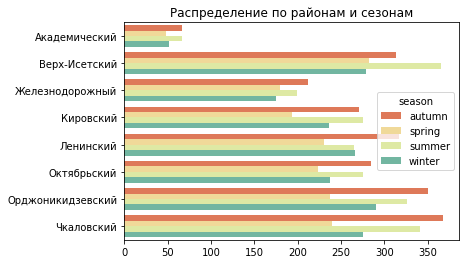

In [57]:
season_district = (
    df_history.groupby(['district', 'season'], 
               as_index=False)
               .agg({'id': 'count'})
)
sns.barplot(data = season_district, x='id', y='district', hue='season', palette='Spectral')
plt.title('Распределение по районам и сезонам')
plt.xlabel('')
plt.ylabel('');

Этот график показывает нам те же данные что и по городу вцелом, тут ни один район не отличается особой оригинальностью: осенью и весной везде больше аварий.

### Аварии где водитель-мужчина и водитель-женщина

In [58]:
ekb_map = folium.Map(location=[56.8519, 60.6122], zoom_start = 10)
# добавим границы районов
for _, d in df_polygons.iterrows():
    sim_geo = gpd.GeoSeries(d['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    
    folium.Popup(d['district']).add_to(geo_j)
    geo_j.add_to(ekb_map)
ekb_map

incidents_accident = folium.map.FeatureGroup()
latitudes = list(df.lat)
longitudes = list(df.long)
labels = list(df.sex)
for lat, lng, label in zip(latitudes, longitudes, labels):
    if label == 'Мужской':
        folium.features.CircleMarker(
        location = [lat, lng],
        radius=2,
        popup = label,
        color='blue',
        fill=True,
        fill_opacity=0.6
        ).add_to(ekb_map)
    elif label =='Женский':
        folium.features.CircleMarker(
        location = [lat, lng],
        radius=2,
        popup = label,
        color='red',
        fill=True,
        fill_opacity=0.6).add_to(ekb_map)
    
        
ekb_map.add_child(incidents_accident)
ekb_map

[Содержание](#0)

## Вывод
<a id=7> </a>

Мы провели исследование транспортной безопасности Екатеринбурга в 2022 году и также изучили исторические данные.
В предоставленных данных нехватало адресов - мы достали их по координатам при помощи Open street map и geopy.  
Выяснили что в нашем источнике данные с 2015 года, что позволяет нам проанализировать достаточно большой объем данных о ДТП - почти за 8 лет, но из-за того что в наших данных отсутствует декабрь 2022 года - мы не можем в полной мере рассмотреть сезонность и распределение аварий по месяцам. Скорее всего, следует дождаться окончания года и перезалить данные. 

Пока что мы пришли к следующим выводам:
1. Внешние условия:
- ночью происходит меньше ДТП чем днем, выше всего вероятность попасть в ДТП в 7 и 11 утра, а так же с 17:00 до 19:00.
- в выходные и пятницу по-ночам чуть больше аварий. Возможно, в более крупном городе эта зависимость будет более ярко выражена.
- в выходные аварий меньше, чем в будни.
- есть явно выраженная сезонность: с января по март аварий значительно меньше и так во все годы исследуемого периода, в 2020 падение еще более драматичное.
2. Типология аварий:
- в топе с большим отрывом - столкновение и наезд на пешехода. (Есть еще "падение пассажира" - но мне не очень понятно, что собой представляет данный тип аварии)
- легких ДТП значительно больше и их пропорция растет со временем - ДТП со смертельным исходом становится все меньше.
- вероятность попасть в аварию хорошо коррелирует со стажем вождения, при чем и у женщин и у мужчин, но женщин со стажем вождения больше 30 лет почти нет, а еще у женщин эта корреляция не такая заметная.
- аварий, совершенных женщинами, около 20% (что в принципе коррелирует с общей статистикой о количестве водителей - мужчин и женщин на дорогах, насколько мы вообще можем найти какую бы то ни было статистику на этот счет. 
- так же статистика о тяжести ДТП пропорциональна у мужчин и женщин.
- в большинство аварий вовлечено 2 и 3 автомобиля.
3. Районы города:
- самый безопасный район - Академический, в нем и меньше всего абсолютное число аварий и еще и с 2020 года нет ДТП со смертельным исходом.
- во всех районах количество тяжёлых ДТП снижается, а легких - растет
- в 2022 году снижалось количество всех видов ДТП почти во всех районах. Но у нас нет статистики за последний месяц.
- в Октябрьском районе доля ДТП со смертельным исходом больше всего - не удиительно, это во-первых, большой по площади район, а во сторых, в нем расположена дорога в аэропорт и еще несколько автострад с высоким скоростным режимом.
4. Согласно тепловой карте, самые опасные участки города:
- перекресток Щорса-Белинского
- Щорса-Степана-Разина
- развязка на Сибирском тракте
- улица 40-летия Октября
- перекресток Шефской и проспекта Космонавтов
- несколько мест Объездной дороги.

Дополнительно можно изучить:
1. зависимость от покрытия дороги
2. близость определенных объектов: школ, тц, стадионов.
3. построить тепловую карту корреляций и посмотреть какие признаки коррелируют между собой
4. выделить кластеры особо-опасных районов при помощи алгоритмов машинного обучения.